In [1]:
#Replicating the simulation
import numpy as np

#First we introduce the initial Hamiltonian:
#Assume hw = 1
pauli_z = np.array([[1,0],[0,-1]])
identity = np.array([[1,0],[0,1]])

hw=1

H_0 = hw*(np.kron(pauli_z,np.kron(identity,identity))
         + np.kron(identity,np.kron(pauli_z,identity))
        +np.kron(identity,np.kron(identity,pauli_z)))


print(H_0)

#Expand dimensions from (8x8) to (8x8x1) so we can append 
#time slices for each hamiltonian
H_0 = H_0.reshape((H_0.shape[0],H_0.shape[1],1))

[[ 3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0 -3]]


This matrix is in line with page $3$ of the original notebook. We also want to find the ground state of the following hamiltonian:

In [2]:
pauli_x = np.array([[0,1],[1,0]])
hom = 1.23 #h*\omega

H_1 = hw*(np.kron(pauli_x,np.kron(identity,identity))
         - np.kron(identity,np.kron(pauli_x,identity))
         + np.kron(identity,np.kron(identity,pauli_x)))


H_int = hom*(np.kron(pauli_x,np.kron(pauli_x,identity))
           + np.kron(pauli_x,np.kron(identity,pauli_x))
           + np.kron(identity,np.kron(pauli_x,pauli_x)))

H_new= H_1 + H_int
print(H_new)
print(H_new.shape)

#Expand dimensions from (8x8) to (8x8x1) so we can append 
#time slices for each hamiltonian
H_new = H_new.reshape((H_new.shape[0],H_new.shape[1],1))


[[ 0.    1.   -1.    1.23  1.    1.23  1.23  0.  ]
 [ 1.    0.    1.23 -1.    1.23  1.    0.    1.23]
 [-1.    1.23  0.    1.    1.23  0.    1.    1.23]
 [ 1.23 -1.    1.    0.    0.    1.23  1.23  1.  ]
 [ 1.    1.23  1.23  0.    0.    1.   -1.    1.23]
 [ 1.23  1.    0.    1.23  1.    0.    1.23 -1.  ]
 [ 1.23  0.    1.    1.23 -1.    1.23  0.    1.  ]
 [ 0.    1.23  1.23  1.    1.23 -1.    1.    0.  ]]
(8, 8)


This is also in line with the hamiltonian we sought to find the groundstate of. Now, we construct the adiabatic hamiltonian via the equation:

$$
H_t = (1-\frac{t}{T})H_0 + \frac{t}{T}H
$$

In [3]:
T = 20 #End at the number 20(assume seconds)
slices = 1000
t = np.linspace(0,T,slices)
#print("Time Slices: ",t ,"\n\n")


H_t = (1-t/T)*H_0 + t/T*(H_new)


print(H_t.shape)
print(H_t[:,:,0])

#If slices are small, then print this out for testing
#for i in range(H_t.shape[2]):
#    print(H_t[:,:,i])

(8, 8, 1000)
[[ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.]]


Now, we must plot the eigenvalues for each time slice; we create an array of eigenvalues to do this.

In [4]:
eig_t = np.empty((0,0))
eig_val = 0
eig_vec = 0
size = H_t.shape[0] # 8 Eigenvalues expected from the shape of H_t

In [5]:
eig_val, eig_vec = np.linalg.eig(H_t[:,:,0])
#Order the eigenvalues to the corresponding sections
index = eig_val.argsort()[::-1]   
eig_val= eig_val[index]
eig_val = eig_val.reshape((eig_val.shape[0],1))

eig_t = np.append(eig_t,eig_val)
eig_t = eig_t.reshape((size,1))

for i in range(1, H_t.shape[2]):
    eig_val, eig_vec = np.linalg.eig(H_t[:,:,i])
    #print("Hamiltonian at time ", i ,": ",H_t[:,:,i])    
    #Order the eigenvalues to the corresponding sections
    index = eig_val.argsort()[::-1]   
    eig_val= eig_val[index]
    eig_val = eig_val.reshape((eig_val.shape[0],1))
    
    #Tests
    #print("Eigenvalues: ",eig_val)
    #print("Eigenvector: ",eig_vec)
    #print(eig_t.shape)
    #print(eig_val.shape)
    
    eig_t = np.append(eig_t,eig_val, axis = 1)
    eig_t = eig_t.reshape((size,i+1))
    #print("Eigenvalues-translated: ",eig_t[:,i])
    
print(eig_t.shape)

(8, 1000)


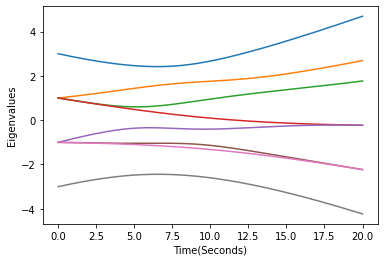

In [6]:
t = t.reshape((t.shape[0],))
import matplotlib.pyplot as plt
for i in range(eig_t.shape[0]):
    plt.plot(t, eig_t[i,:])

    
plt.xlabel('Time(Seconds)')
plt.ylabel('Eigenvalues')
plt.show()

This graph is in agreement with our expected plot on mathematica. We now can find the expectation value -- and therefore the ground state -- via the equation:

$$
< \psi(T)| H |\psi(T)>
$$

where $\psi(T)$ is derived via the time-evolution operator:

$$
|\psi(T)> = U(T,t_0)|\psi(t_0)>
$$

This graph is in agreement with our expected plot on mathematica. We now can find the expectation value -- and therefore the ground state -- via the equation:

$$
< \psi(T)| H |\psi(T)>
$$

where $\psi(T)$ is by solving the complex differential equation for the coefficients of $\psi(T)$

Now we begin defining the terms to solve for $|\psi(t)>$. The first up is $|\psi(0)>$ and $H_t$

In [7]:
from scipy.integrate import complex_ode
#We begin first with the simulation where 
#psi_0 = Ground state of H_t[0]:
psi_0 = np.array([0,0,0,0,0,0,0,1])

H_t = (1-t/T)*H_0 + t/T *H_new

#print("Hamiltonian shape (time, n,n): ",H_t.shape)
dt = t[1] - t[0] #Evenly spaced time intervals
print("dt = ",dt)
#print("dt = ",dt)
#print("Initial time: ", t[0])

#print("Hamiltonian_0: ",H_t[0,:,:])

dt =  0.02002002002002002


We chose $|\psi(0)> = |7>_3$ since this is the groundstate for $H(0)$. We can confirm this by taking the expectation value and measuring it against the actual ground state: 

In [8]:
print(H_t.shape)

g_0 = np.dot(psi_0.T, np.dot(H_t[:,:,0],psi_0))
print("Calculated ground state:", g_0)

eig_v0, eig_s0 = np.linalg.eig(H_t[:,:,0])
print("Actual ground state: ", min(eig_v0))


(8, 8, 1000)
Calculated ground state: -3.0
Actual ground state:  -3.0


In [9]:
"""
Before we continue, we note that the complex_ode does not accept 
additional arguments using the function .set_f_params()

For whatever reason, scipy.intergate.complex_ode does not 
pass extra arguments. Instead we will create a class that, 
by default, passes the extra arguments into the function.
"""

class FuncObj(object):
    def __init__(self, f, farg):
        self._ode_ham = f
        self.farg=farg

    def ode_ham(self, t, y):
        return self._ode_ham(t, y, self.farg)
    
    def set_arg(self, farg):
        self.farg = farg
        return
    def print_fargs(self):
        print("fargs:", self.farg)
        print("fargs.shape: ", self.farg.shape)
        return

Now we define the complex ode, which is calculated by the equation; for all coefficients up to $2^n$ (where $n$ is the number of qubits) at time slice $t$:

$$
\frac{dc_j}{dt} = -i\sum_k(c_k<j|H_t|k>)
$$

where $c_j$ is coefficient $j$ of $2^n$. In addition the expectation value of bra $<j|$ is taken with the Hamiltonian at slice $t$ and each state of $|\psi(t)>$, which is denoted by $|k>$ we repeat this for every time slice. We implement this in the formula `ode_ham`:

In [10]:
def ode_ham(t,psi,ham):
    """
    ODE which represents the formula

    dc_j                                     
    ---- = sum_k(<j|H_t|k> c_k)                        
     dt

    In other words, for all states of psi, summed by the equation
     sum_k(H_t|k>c_k)
    We also distribute the inner product with the bra vector <j|,
    Where j
    """
    #print("Time slice: ", t)
    #print("Psi: ", psi)
    #print("Current Hamiltonian: ", ham)
    coeff_derivatives = np.empty((0,0))
    psi = psi.reshape((psi.shape[0],1))
    
    #print("Time slice: ", t)
    #For all basis vectors 2^n, |j> at time, t:
    #Or is it, for all vectors in |psi>, c_j|j>, at time, t?
    for j in range(psi.shape[0]):
        state_j = np.zeros((psi.shape[0],1))
        #Complex conjugate transpose:
        #(0..... 1 .....0)
        state_j[j] = 1
        state_j = np.matrix.getH(state_j)
        #print("New state |j>: ", state_j)
        
        #Calculates <j|H_t|k>c_k
        #For all c_k in psi
        c = -1j*np.dot(state_j,np.dot(ham,psi))

        #Print only if we have few time slices, t
        #print("Coefficient dc_",j,"/dt:", c)
        #The R.H.S. of the ODE for c_j at time, t
        #print("dC_j/dt: ", c)
        coeff_derivatives = np.append(coeff_derivatives,c)
        #print("Shape of coefficient list dc_i/dt:",
        #coeff_derivatives.shape)
        
        
    #R.H.S. of ODE of c_j for ALL states j in |psi(t)> 
    return coeff_derivatives

To evaluate the change in the coefficients over time from $t=0$ to $t=T$, and therefore evaluate $|\psi(t)>$, we must implement the object we defined earlier, `FuncObj` to include our initial time-dependent Hamiltonian, $H_t$.

In [11]:
#Final psi, evolving operator
psi_f = psi_0.copy()

In [12]:
def solve_comp(ode_solver, H_t, psi_0, t):
    arg = FuncObj(ode_solver, H_t[:,:,0])

    """
    Create our complex_ode object for H_t1
    """
    r = complex_ode(arg.ode_ham)
    r.set_integrator("dop853")
    r.set_initial_value(psi_0,t[0])
    """
    Stores eiegenvalues of size psi_0.shape[0] for 
    t.shape[0] time intervals
    """
    psi_t = np.empty((psi_0.shape[0],t.shape[0]))
    #print("psi_t.shape: ",psi_t.shape)

    #For every time slice, integrate the complex ode
    for time in range(t.shape[0]):
        arg.set_arg(H_t[:,:,time])
        r.integrate(r.t+dt)
        #print(H_t[time,:,:].shape)
        #print("New state coefficients - ",r.y)
        psi_f = r.y
        #print(psi_f.shape)    
        psi_t[:,time] = psi_f.copy()
        #print("New Coefficients - translated: ",psi_t[:,time])

    #psi_t to see evolution, 
    #psi_f to see final state and use for calculations
    return psi_t, psi_f

In [13]:
#Solve the complex ode for H(T)
print(H_t.shape)
print(psi_0.shape)
print(t.shape)
psi_time, psi_f = solve_comp(ode_ham, H_t, psi_0, t)

print(psi_time.shape)
print(psi_f.shape)
print(t.shape)

(8, 8, 1000)
(8,)
(1000,)


<ipython-input-12-0cd1e652956c>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_t[:,time] = psi_f.copy()


(8, 1000)
(8,)
(1000,)


psi(T)= [-0.30045874+0.17676172j  0.30579531-0.17595571j -0.3104128 +0.17249036j
  0.30949562-0.1733896j   0.30579531-0.17595571j -0.31109913+0.17431813j
  0.30949562-0.1733896j  -0.30682114+0.17440403j]


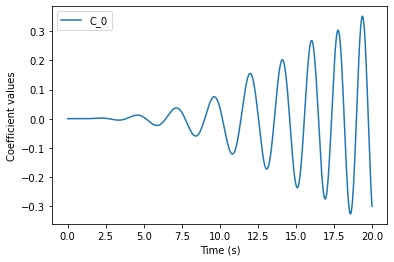

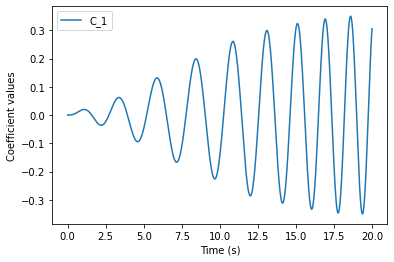

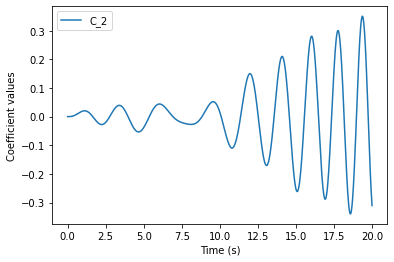

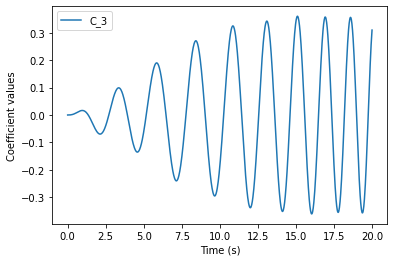

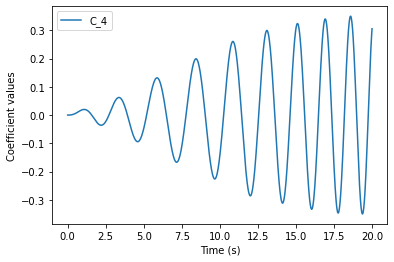

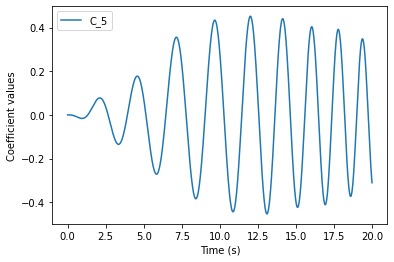

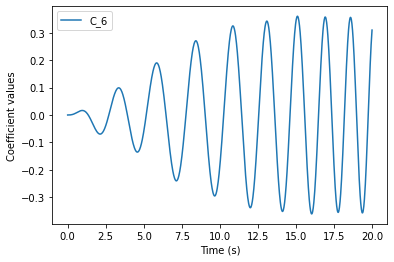

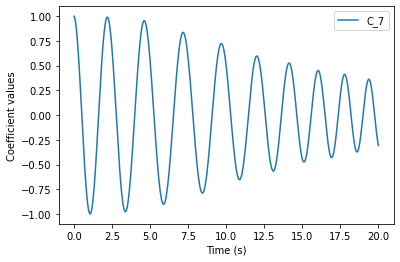

In [14]:
print("psi(T)=", psi_f)
for coeff in range(psi_0.shape[0]):
    plt.plot(t, psi_time[coeff,:], label = "C_"+str(coeff))
    plt.xlabel("Time (s)")
    plt.ylabel("Coefficient values")
    plt.legend()
    plt.show()
    
#plt.xlabel("Time (s)")
#plt.ylabel("Coefficient values")
#plt.legend()
#plt.show()

In [15]:
"""
Find the ground state using the final |psi(t)> value:
"""
#H_new.shape
eig, eig_state = np.linalg.eig(H_new[:,:,0])
ground_eig = min(eig)

print("Expected ground state: ",ground_eig)

#Experimental value:
e_g = np.dot(np.matrix.getH(psi_f), 
             np.dot(H_t[:,:,t.shape[0]-1],
                    psi_f))
print("Experimental ground state: ",e_g)


Expected ground state:  -4.2299999999999995
Experimental ground state:  (-4.229523418717363+0j)


**We affirm that our simulation works sufficiently for any time-dependent hamiltonian operating on H(t)**. Note that increasing $t$ will make the simulation last longer but will yield increasingly accurate results.